<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Content" data-toc-modified-id="Table-of-Content-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Content</a></span></li></ul></div>

This notebook aims to allocate the development related to exploratory analysis of insights related to the dataset [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) taken from the Kaggle platform to improve skills in Data Science and Machine Learning. In parallel, this notebook uses the tools presented on the `xplotter` python library made by myself and published on PyPI repository. This is a real good effort for coding useful functions for making the Exploratory Data Analysis process a lot more easier for Data Scientists and Data Analysis through deliverying charts customization and matplotlib/seaborn plots with a little few lines of code. I really hope you all enjoy it!

___
**_Description and context:_**
_The sinking of the Titanic is one of the most well-known events in the world. [...] While some factors related to "luck" were present among the survivors, apparently some specific groups of passengers and crew were more likely to survive than others. In this challenge, it is proposed to create a Machine Learning model capable of answering the following question: "Which groups of people could be more able to survive the shipwreck?"_

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>

* [1. Reading the Data](#1)
* [2. EDA: Exploring Insights](#2)
    - [2.1 Survival Rate](#2.1)
    - [2.2 Gender Analysis](#2.2)
    - [2.3 Social Class Influence](#2.3)
    - [2.4 Companion on the Ship](#2.4)
    - [2.5 The Age Factor](#2.5)
    - [2.6 Fare Paid by Passengers](#2.6)
    - [2.7 Simultaneous Analysis](#2.7)
* [3. Conclusion](#3)
* [4. References](#4)

In [1]:
# Instaling xplotter library in its most recent version
!pip install xplotter --upgrade

In [2]:
# Project libraries
import pandas as pd
import os
from warnings import filterwarnings
filterwarnings('ignore')

# Appending the module path (optional)
import sys
sys.path.append('../../')

# Project variables
DATA_PATH = 'data/'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Reading the Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

After importing the main libraries common to the project and also defining important variables for reading the data, it is possible to make the first contact with the database available for the development of the task.

In [3]:
# Reading training data
df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In case you may ask about [metadata](https://www.kaggle.com/c/titanic/data), here is some useful points to consider:

- **_PassengerId:_** reference of passenger id registered on the trip;
- **_Survived:_** target variable indicating passenger's survival (1=yes, 0=no);
- **_Pclass:_** passenger's social class (ticket's reference) (1=high, 2=medium ou 3=low);
- **_Name:_** passenger's name;
- **_Sex:_** passenger's gender;
- **_Age:_** passenger's age;
- **_SibSp:_** total of passenger's siblings / spouses aboard the ship;
- **_Parch:_** total of passenger's parents / children aboard the ship;
- **_Ticket:_** passenger's ticket reference number;
- **_Fare:_** amount paid of passenger on the ticket bought;
- **_Cabin:_** passenger's cabin reference number;
- **_Embarked:_** port of embarkation(C=Cherbourg, Q=Queenstown, S=Southampton).

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. EDA: Exploring Insights</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

At this point, there is a well-defined context of the project's objective, in addition to a database already read and transformed into a DataFrame format of the pandas. From this moment on, a true scan of the data will be proposed for the application of a detailed descriptive analysis in order to gather relevant insights for the business context.

Using the homemade package [xplotter](https://github.com/ThiagoPanini/xplotter), whose construction was motivated exactly to facilitate the work of data scientists in the pillars of insights and exploratory data analysis. The next steps will be based on the tools provided from xplotter library to make beautiful charts in order to get a deep understand of our data. 

<img src="https://i.imgur.com/mJ1ExBQ.jpg" width=300 height=200 alt="xplotter logo">

<a id="2.1"></a>
<font color="dimgrey" size=+2.0><b>2.1 Survival Rate</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

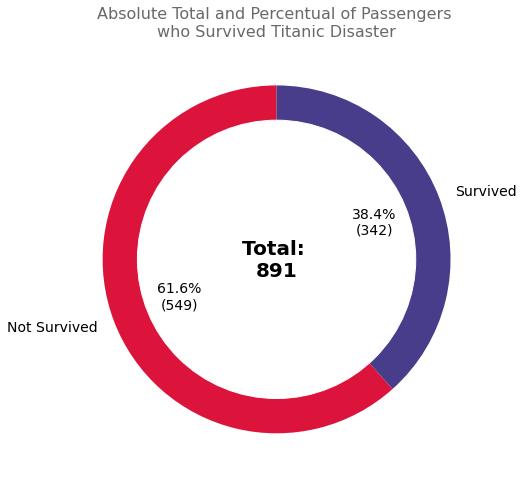

In [4]:
# Importing libraries
from xplotter.insights import *

# Survival rate
survived_map = {1: 'Survived', 0: 'Not Survived'}
survived_colors = ['crimson', 'darkslateblue']
plot_donut_chart(df=df, col='Survived', label_names=survived_map, colors=survived_colors,
                 title='Absolute Total and Percentual of Passengers \nwho Survived Titanic Disaster')

The graph above clearly shows the proportion of survivors and victims of the 891 passengers and crew present in the database available for analysis. In it, it is possible to perceive a greater number of victims of the shipwreck, totaling 549 passengers or 61.6% of the total. The smallest number of survivors adds up to 342 passengers or 38.4% of the total.

The `Survived` variable can be given as the target variable for a possible predictive model to be trained in this notebook in the future. The main objective is to analyze the main factors or to identify the main groups of passengers with a greater chance of survival in view of the demographic and social characteristics present in the base.

<a id="2.2"></a>
<font color="dimgrey" size=+2.0><b>2.2 Gender Analysis</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

From the survival analysis performed above, it is possible to expand the views using other variables present in the base. In this session, we will check if there was any influence of the passenger gender on the issue of survival.

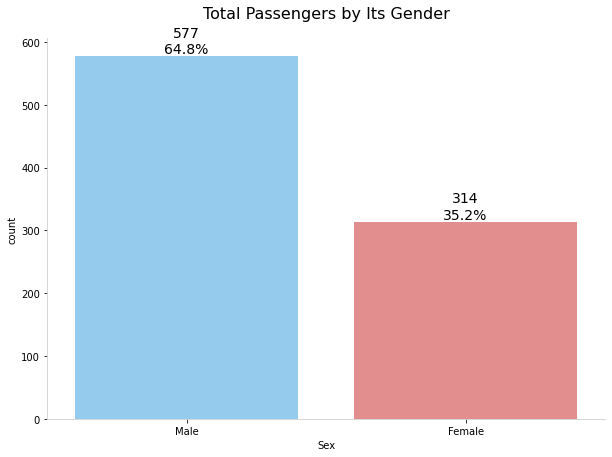

In [5]:
# Countplot for gender
gender_colors = ['lightskyblue', 'lightcoral']
gender_map = {'male': 'Male', 'female': 'Female'}
plot_countplot(df=df, col='Sex', palette=gender_colors, label_names=gender_map,
               title='Total Passengers by Its Gender')

From the graph above, it can be seen that the public of travelers on the Titanic was made up of approximately 65% men and 35% women, and this can probably be considered a standard scenario for the time (after all, we are talking about something that occurred in the middle of 1911).

Keeping in mind the total volumetry by gender is essential for further analysis of the survival rate by gender.

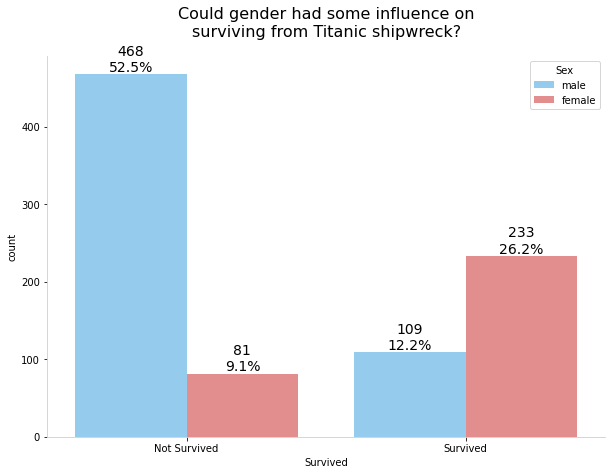

In [6]:
# Survival rate by gender
plot_countplot(df=df, col='Survived', hue='Sex', label_names=survived_map, palette=gender_colors,
               title="Could gender had some influence on\nsurviving from Titanic shipwreck?")

The graph above shows that, of the 549 recorded victims (61.6% of the total), we have 468 (or 52.5%) males and only 81 (or 9.1%) females. On the other hand, of the 342 (or 38.4%) survivors, we have 109 (or 12.2%) males and 233 (or 26.2%) females.

In other words, the graph shows that there was a possible rescue priority given to the women of the vessel, since their share of representativeness is more significant in the group of survivors than in the group of victims. To explain this scenario, it is possible to imagine the existence of a possible rescue protocol for prioritizing women and children in emergency cases.

Another way to analyze this representativeness of survival by gender can be found in the double donut chart below:

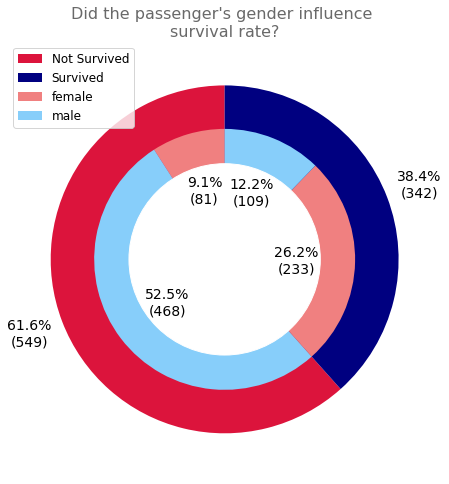

In [7]:
# Plotting a double donut chart
plot_double_donut_chart(df=df, col1='Survived', col2='Sex', label_names_col1=survived_map, 
                        colors1=['crimson', 'navy'], colors2=['lightcoral', 'lightskyblue'],
                        title="Did the passenger's gender influence \nsurvival rate?")

Both graphs show: female passengers had priority in the rescue during the shipwreck.

<a id="2.3"></a>
<font color="dimgrey" size=+2.0><b>2.3 Social Class Influence</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

The next topic of analysis takes into account the values contained in the `Pclass` variable, which, in turn, brings information regarding the social class of each of the passengers present on the vessel.

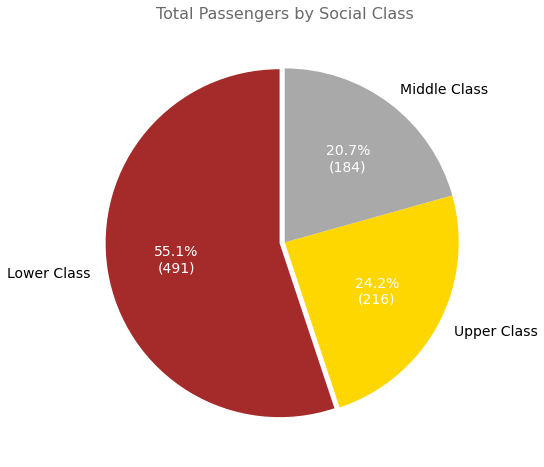

In [8]:
# Number of passengers for each class
pclass_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
plot_pie_chart(df=df, col='Pclass', colors=['brown', 'gold', 'darkgrey'],
               explode=(0.03, 0, 0), label_names=pclass_map,
               title="Total Passengers by Social Class")

With the pie chart above, it is possible to see that the majority of the ship's passengers and crew were formed by members of the lower class, representing just over 55% of the total present. Next, we will analyze whether this variable could, in some way, have included passengers' survival

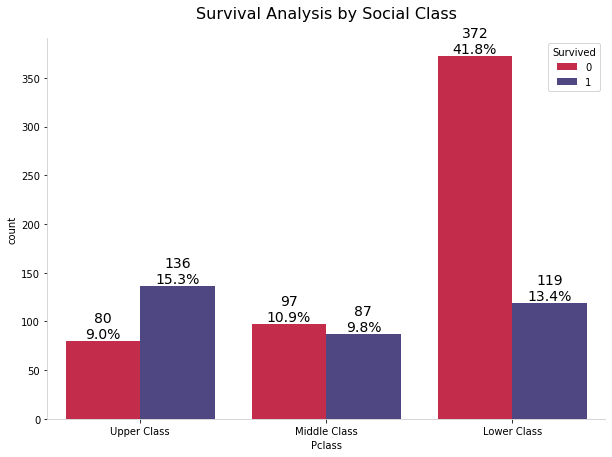

In [9]:
# Relação entre sobrevivência e classe social
plot_countplot(df=df, col='Pclass', hue='Survived', label_names=pclass_map, palette=survived_colors,
               title="Survival Analysis by Social Class")

From reading the bar graph above, it is possible to see how the red (victims) and blue (survivors) bars have different proportions for each of the social classes analyzed in the base. In general, we have:

* Upper Class: there is a higher number of survivors than victims;
* Middle Class: a more equal balance of survivors and victims;
* Lower Class: formed mostly by victims.

This scenario indicates a clear situation: members of the so-called "Upper Class" had a greater chance of surviving the shipwreck than, for example, members of the "Lower Class". Probably some privilege was given to these passengers during the rescue or, in some way, these same passengers could be allocated in more comfortable / safe positions on the ship, thus facilitating the rescue.

There is another to way to construct this analysis. The chart below presents a grouped bar chart using the survival and social class variables:

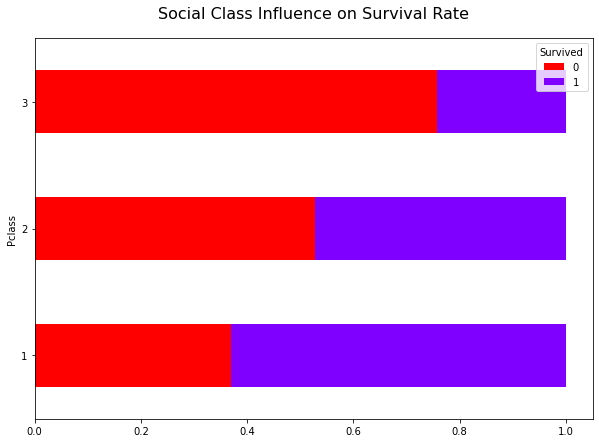

In [10]:
plot_pct_countplot(df=df, col='Pclass', hue='Survived', palette='rainbow_r',
                   title='Social Class Influence on Survival Rate')

<a id="2.4"></a>
<font color="dimgrey" size=+2.0><b>2.4 Companion on the Ship</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

There are two variables in the dataset that inform the presence of passengers' companions on the vessel, namely SibSp (number of siblings or spouses) and Parch (number of parents or children). In this session, we will analyze whether, in any way, the presence of companions influenced the survival of these passengers.

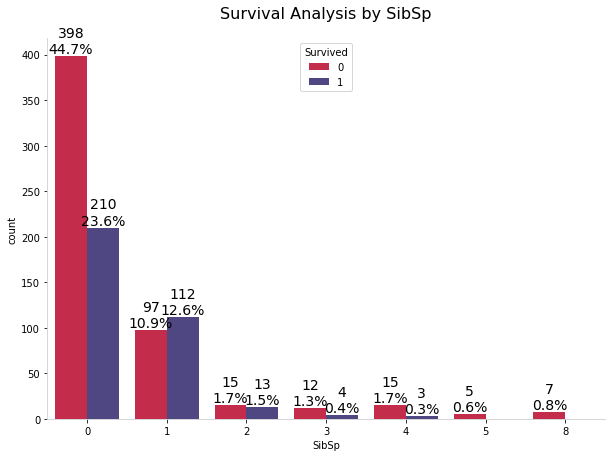

In [11]:
# Relationship between SibSp/Parch and Survived
plot_countplot(df=df, col='SibSp', hue='Survived', orient='v', palette=survived_colors,
               title='Survival Analysis by SibSp')

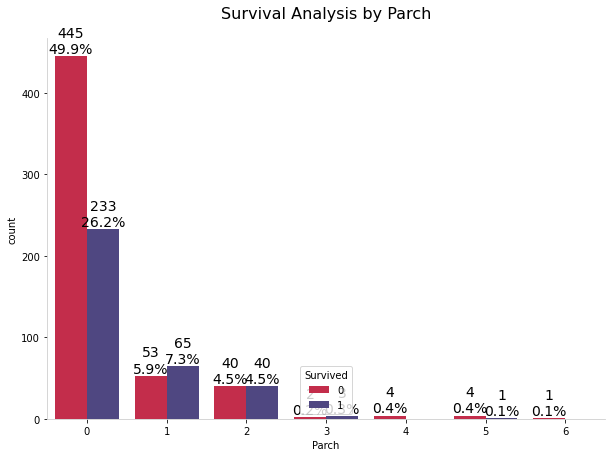

In [12]:
# Relationship between SibSp/Parch and Survived
plot_countplot(df=df, col='Parch', hue='Survived', orient='v', palette=survived_colors,
               title='Survival Analysis by Parch')

Analyzing the two bar graphs above, it is possible to infer that passengers accompanied by 1 or 2 people, be they siblings, spouses, parents or children, prevent a more positive survival scenario in relation to the others.

It is likely that, in the chaotic rescue scenario, the presence of a not too high and not too low number of companions may have helped in the rescue in a possible situation of mutual help.

<a id="2.5"></a>
<font color="dimgrey" size=+2.0><b>2.5 The Age Factor</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Well, until this moment of the exploratory analysis, only categorical attributes present in the base were placed on the agenda. However, the available data set has at least two numerical invoices of probable importance for the project objective: Age and Average Ticket.

In this first moment, we will analyze how age may have influenced the survival of the ship's passengers.

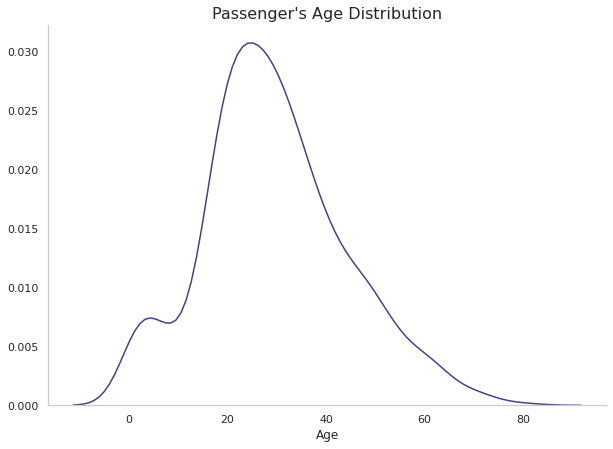

In [13]:
# Distribution of age variable
plot_distplot(df=df, col='Age', title="Passenger's Age Distribution")

In the above distribution, it is possible to have a general idea of the audience present on the ship in terms of age. The peak density occurs at approximately 25 years of age, indicating that the largest range of passengers was formed by a relatively young audience.

We will repeat the density analysis above and build a curve for survivors and another for victims.

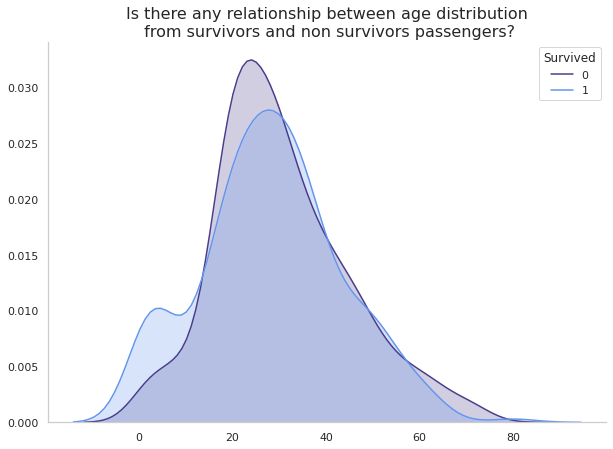

In [14]:
plot_distplot(df=df, col='Age', hue='Survived', kind='kde',
              title="Is there any relationship between age distribution\n from survivors and non survivors passengers?")

Overall, the graph above does not show a clear relationship between the influence of age on passenger survival. However, it is possible to highlight some subtle points on the graph, for example, the elevation of the curve at ages "close to 0", thus indicating a possible rescue priority given to the youngest children.

This scenario is also repeated, even more subtly, in a portion of passengers over 80 years old.

<a id="2.6"></a>
<font color="dimgrey" size=+2.0><b>2.6 Fare Paid by Passengers</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

The `Fare` variable in the data set brings the amount paid by each passenger to board the Titanic. We saw, in some previous stages, that social class may have had a certain influence on the passenger's chance of survival. Does this scenario repeat itself for the amount paid for the entry ticket?

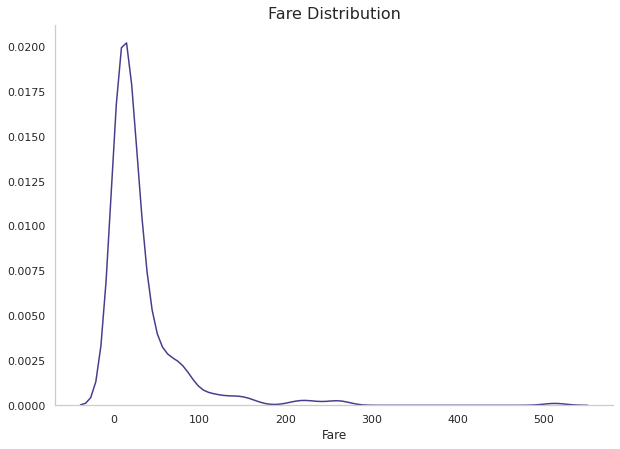

In [15]:
plot_distplot(df=df, col='Fare', title='Fare Distribution')

Here we can see the distribution of Fare variable with some outliers on the right side of the curve (people who paid a really high amount for the ticket).

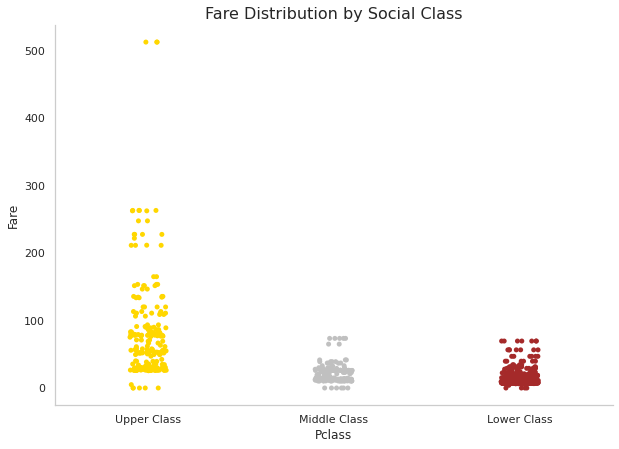

In [16]:
# Fare distribution by social class
plot_distplot(df=df, col='Fare', hue='Pclass', kind='strip', label_names=pclass_map,
              palette=['gold', 'silver', 'brown'],
              title="Fare Distribution by Social Class")

The graph above shows that, in general, the higher the passenger's social class, the higher the ticket paid to enter the ship. Something expected, but of utmost importance its graphic visualization in this study.

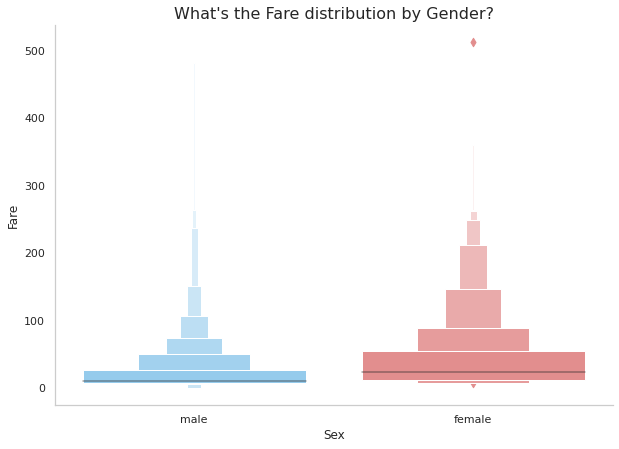

In [17]:
plot_distplot(df=df, col='Fare', hue='Sex', kind='boxen', palette=gender_colors,
              title="What's the Fare distribution by Gender?")

It is interesting to see that, in general, women paid higher amounts than men.

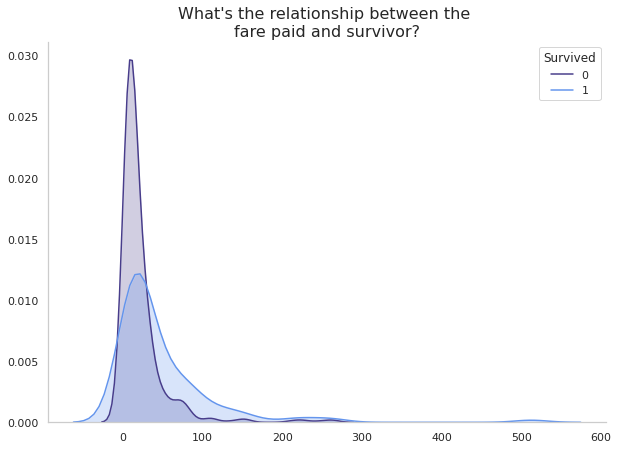

In [18]:
plot_distplot(df=df, col='Fare', hue='Survived', kind='kde',
              title="What's the relationship between the \nfare paid and survivor?")

Finally, the graph above shows a density distribution relating the average ticket paid per passenger and the database survival indicator. Here, it is possible to notice that the orange curve related to the survivors (Survived = 1) has a higher concentration in high values for the Fare variable, thus indicating that the ticket value may have had some influence on the passengers' survival.

<a id="2.7"></a>
<font color="dimgrey" size=+2.0><b>2.7 Simultaneous Analysis</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Within the tools of the `insights` module of the` pycomp` package, it is possible to find some functions built to facilitate analysis in several columns of a base simultaneously. For example, to view volumetries of a series of categorical variables, it would be possible to execute the function `plot_multiple_catplots()`, as shown below:

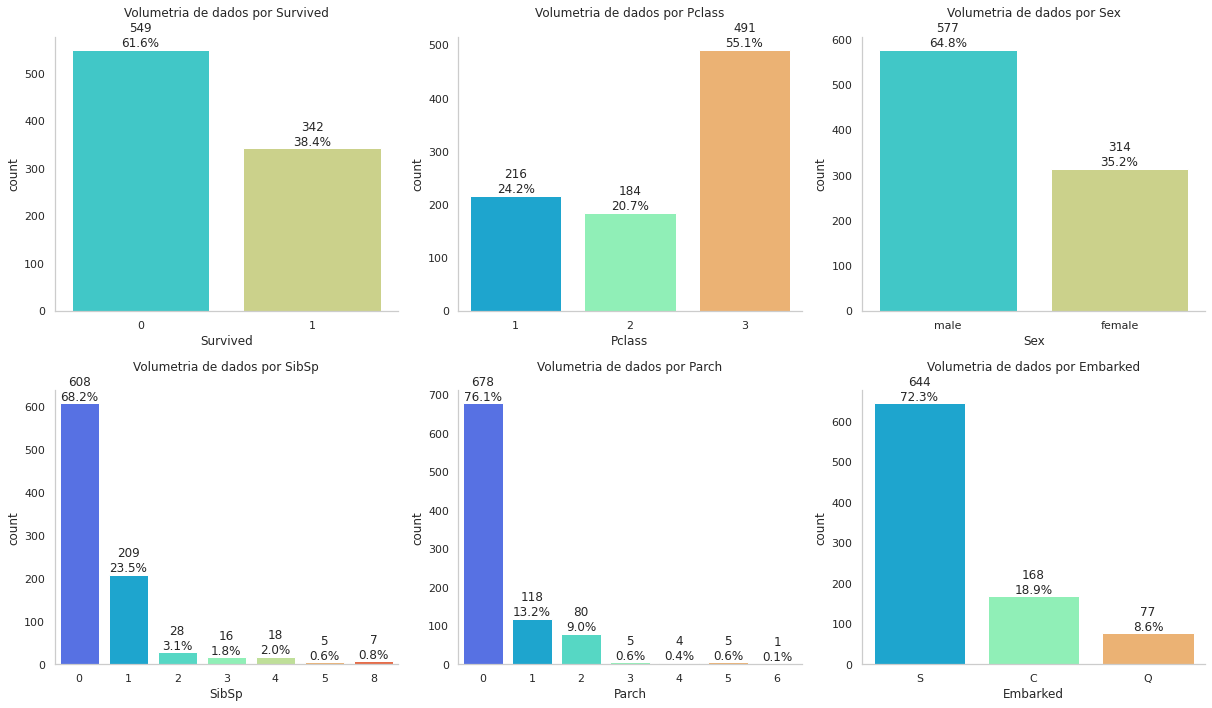

In [19]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
plot_multiple_countplots(df=df, col_list=cat_cols, orient='v')

Another possibility is to analyze categorical columns based on a numerical aggregation column. For this, the `xplotter` module brings with it the` plot_cat_aggreg_report() `function. The block below dynamically analyzes the behavior of the `Embarked` variable and the` Fare` variable together, answering questions such as "what is the volume of passengers per port of departure?" or "what are the statistical averages of the amount paid for the ticket?"

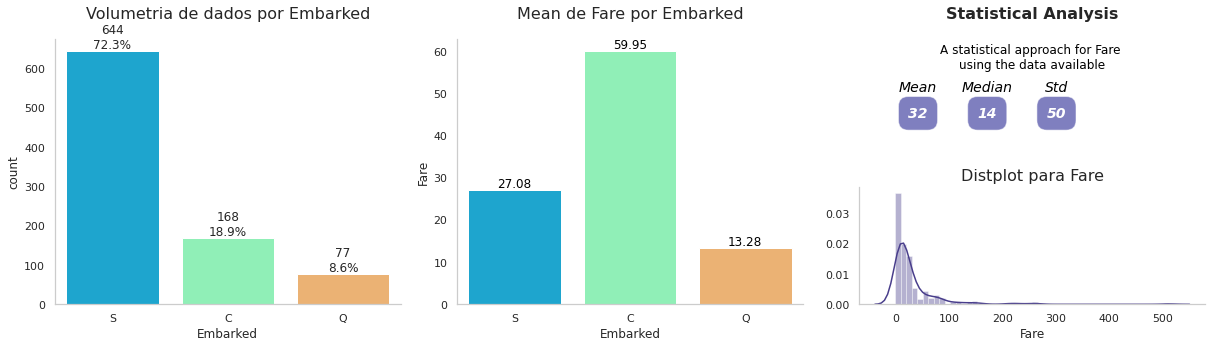

In [20]:
plot_cat_aggreg_report(df=df, cat_col='Embarked', value_col='Fare', title3='Statistical Analysis', 
                       desc_text=f'A statistical approach for Fare \nusing the data available',
                       stat_title_mean='Mean', stat_title_median='Median', stat_title_std='Std', inc_x_pos=10)

<a id="2.8"></a>
<font color="dimgrey" size=+2.0><b>2.8 Correlation Matrix</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

The correlation analysis is essential when looking at the individual influence of each feature in a target variable or the relationship between features itself. After plotting some useful charts, the last topic will use the excellent `plot_corr_matrix()` from xplotter library for plot a beautiful correlation matrix using the Survived variable as the target one.

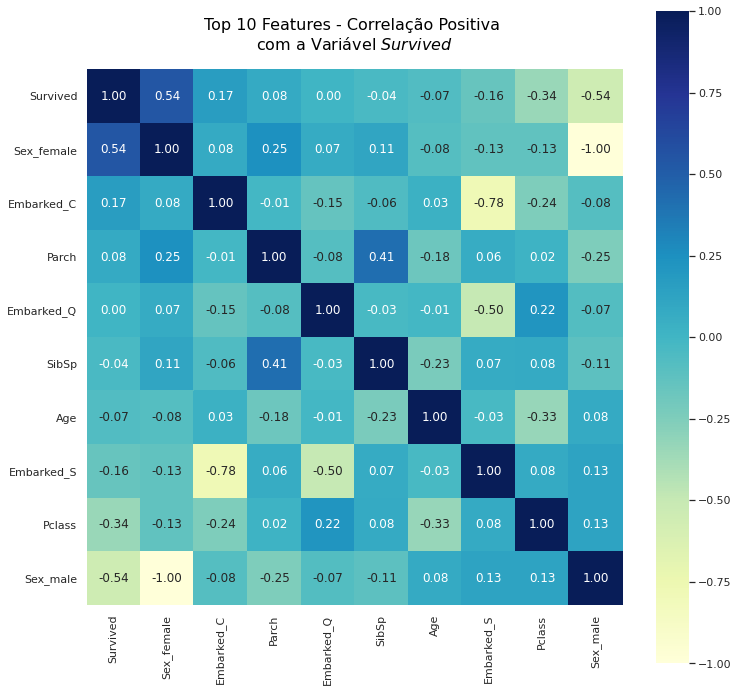

In [21]:
# Preparing a final DataFrame after transformation
df_semiprep = df.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
df_semiprep = pd.get_dummies(df_semiprep)

# Filling null data
age_mean = df_semiprep['Age'].mean()
df_semiprep.loc[:, ['Age']] = df_semiprep.loc[:, ['Age']].fillna(age_mean)

# Plotting a correlation matrix
plot_corr_matrix(df=df_semiprep, corr_col='Survived', figsize=(12, 12), cbar=True)

By default, the `plot_corr_matrix()` function plots the variables using the positive correlation order. In the other hand, the `corr` parameter can be set to plot the features using a negative correlation order, so we can see the influence on the target by another perspective.

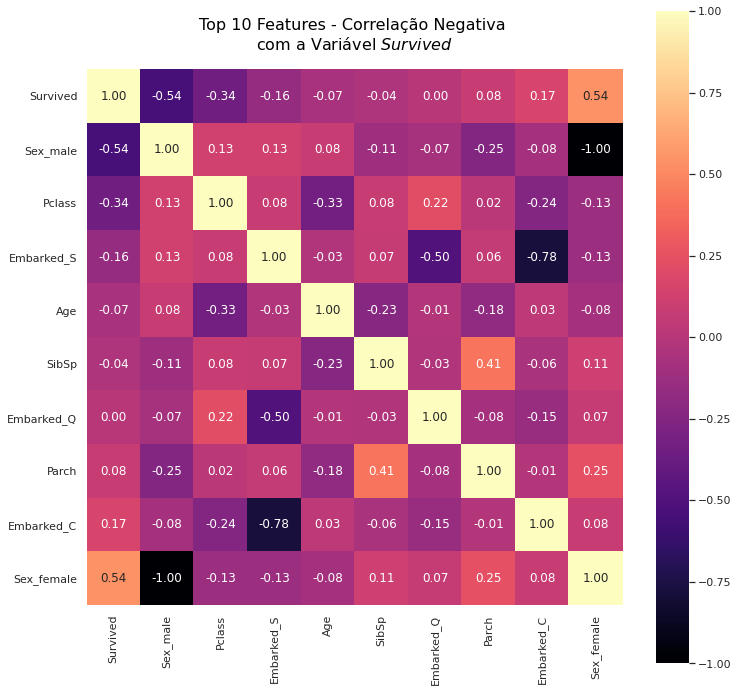

In [22]:
plot_corr_matrix(df=df_semiprep, corr='negative', corr_col='Survived', figsize=(12, 12), cbar=True)

<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Conclusion</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

As long as we went through the complete process of Exploratory Data Analysis on the Titanic dataset, we can see how the `xplotter` library could help on gathering very rich insights from the data with already-built functions that made the job a lot easier. There is an immediate gain on using `xplotter` for understanding the data before taking any action.

There a lot more to come and you can expect a good effort from the developers for delivering the best for data analysis. I hope you enjoyed!

<a id="4"></a>
<font color="darkslateblue" size=+2.5><b>4. References</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

One great inspiration for creating custom features on this project came from the excelent notebook from Awwal Malhi: https://www.kaggle.com/awwalmalhi/titanic-eda-and-feature-engineering

GERON, A.Hands-On Machine Learning with Scikit-Learn and TensorFlow. [S.l.]:O’Reilly, 2017. ISBN 978149196229.

NG, A.Machine Learning. Available at: <https://www.coursera.org/learn/machine-learning/home/welcome>

<font size="+1" color="black"><b>Please visit my other kernels by clicking on the buttons</b></font><br>

<a href="https://www.kaggle.com/thiagopanini/pycomp-customer-eda-and-churn-prediction" class="btn btn-primary" style="color:white;">Pycomp: Churn Prediction</a>
<a href="https://www.kaggle.com/thiagopanini/pycomp-exploring-and-modeling-housing-prices" class="btn btn-primary" style="color:white;">Pycomp: Housing Prices</a>
<a href="https://www.kaggle.com/thiagopanini/predicting-restaurant-s-rate-in-bengaluru" class="btn btn-primary" style="color:white;">Bengaluru's Restaurants</a>
<a href="https://www.kaggle.com/thiagopanini/sentimental-analysis-on-e-commerce-reviews" class="btn btn-primary" style="color:white;">Sentimental Analysis E-Commerce</a>